# Análise Fatorial
---

O modelo de **Análise Fatorial** visa descobrir e analisar a estrutura de um conjunto de variáveis inter-relacionadas, descrevendo-as em um menor número de variáveis não observadas, as quais são linearmente relacionadas com as originais, chamadas de *fatores comuns* ou *variáveis latentes*.

As variáveis observadas são modeladas como combinações lineares entre os fatores, os quais representam também as dimensões latentes (constructos), somados a um erro aleatório, sendo que, como dito, os fatores são as variâncias das variáveis originais condensadas i.e. covariância, e o erro é o a variância única da variável original. A imagem abaixo exemplifica a ideia da análise fatorial:

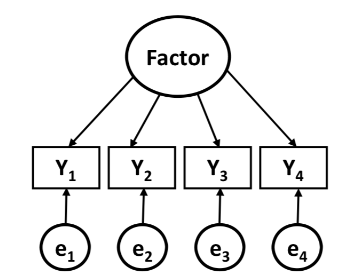


A combinação linear é exposta como:

$$ Z_1 = w_{11} F_1 + w_{12} F_2 + ... + w_{1m} F_m + \varepsilon_1 $$ 
$$ Z_2 = w_{21} F_1 + w_{22} F_2 + ... + w_{2m} F_m + \varepsilon_2 $$ 
$$ ... $$
$$ ... $$
$$ ... $$
$$ Z_n = w_{n1} F_1 + w_{n2} F_2 + ... + w_{nm} F_m + \varepsilon_n $$ 

sendo que $Z_i = \frac{X_i - \mu}{\sigma_i}$ é a variável padronizada, premissa requerida pelo modelo, onde $X_i$ é a variável original com média $\mu$ e variância $\sigma²$, e $\varepsilon_i$ é o i-ésimo erro aleatório para $i = 1,...,n$. Os fatores são representados por $F_j$, com $j=1,...,m$, e os coeficientes da variável padronizada são representados por $w_{ij}$, chamados de *cargas fatoriais* (*loadings*), os quais representam o grau de relação linear entre o fator e a variável padronizada.

Ademais, outras *premissas* são assumidas, como ausência de outliers, tamanho da amostra deve ser superior ao número de fatores, sem multicolinearidade completa (i.e. = 1).


É importante salientar que a análise fatorial (FA) é relacionada com a análise de componentes principais (PCA). 
Portanto, adiante são mencionadas algumas diferenças em relação a ambos:

- enquanto os componentes do PCA explicam o máximo de variância contida nos dados, FA explica a covariância i.e. variância conjunta (inter-relação) presente nos dados;
- os compoentens do PCA são ortogonais entre si (ausência de associação), enquanto na FA isso não é necessariamente verdadeiro;
- os componentes do PCA são combinações lineares da variável observada, enquanto que na FA, as variáveis observadas são combinações lineares de variáveis não-observadas (fatores $\to$ variáveis latentes);
- PCA é uma técnica estatística descritiva para redução de dimensionalidade não-supervisionada, enquanto FA é uma técnica de modelagem, assumindo a existência de um modelo estatístico e utilizando técnicas de modelos de regressão para testar hipóteses.

Basicamente, utiliuza-se como uma **rule of thumb** a seguinte regra: utilizar PCA quando o objetivo é redução de dimensionalidade, e utilizar FA quando o objeitvo é compreender quais constructos estão por trás dos dados.

O dataset utilizado no modelo pode ser encontrado em [aqui](https://github.com/franciscoicmc/ciencia-de-dados/blob/master/data.zip).


Referências: [[1]](https://edisciplinas.usp.br/pluginfile.php/2204134/mod_resource/content/1/An%C3%A1liseMultivariada-Aula11.pdf), [[2]](http://www.portalaction.com.br/manual-analise-multivariada/analise-fatorial), [[3]](https://edisciplinas.usp.br/pluginfile.php/3769563/mod_resource/content/1/Favero_07_AnaliseFatorial.pdf#:~:text=A%20an%C3%A1lise%20fatorial%2C%20ou%20an%C3%A1lise,relacionadas%2C%20buscando%20identificar%20fatores%20comuns.), [[4]](https://www.datacamp.com/community/tutorials/introduction-factor-analysis), [[5]](https://en.wikipedia.org/wiki/Factor_analysis#Criteria_for_determining_the_number_of_factors).



In [134]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [135]:
df = pd.read_csv('./Vehicle.csv')

df = df.drop(['Class'], axis=1)

df.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [136]:
scaler = StandardScaler()

df_ = scaler.fit_transform(df)

df_ = pd.DataFrame(df_, columns=df.columns)

df_.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


## Análise Fatorial
---

Antes de aplicar a Análise Fatorial, alguns testes de adequação dos dados são aplicados, visando avaliar se fatores podem ser encontrados nos dados, extendendo assim as premissas presentes. Dentre os testes, temos [[6]](https://stats.stackexchange.com/questions/43304/what-are-the-assumptions-of-factor-analysis):

- Teste de Bartlett $\to$ existem correlações razoavelmente altas nos dados
- Teste de Kaiser-Meyer-Olkin (KMO) $\to$ correlações parciais são fracas, e fatores podem ser definidos

---

- **Teste de esfericidade de Bartlett:** utilizado para checar a hipótese nula de que os dados são de uma distribuição multivariada normal com zero covariância i.e. $H_0 \to$ matriz de correlação das amostras é uma matriz identidade, ou seja, a matriz de covariância é diagonal, denotada por p-value $<0.05$ [[7]](https://stats.stackexchange.com/questions/92791/why-does-sphericity-diagnosed-by-bartletts-test-mean-a-pca-is-inappropriate).

Como resultado, vemos um p-value igual a 0, ou seja, o teste foi estatisticamente significante, indicando que a matriz de correlação observada não é uma matriz identidade.

In [137]:
chi2, p_value = calculate_bartlett_sphericity(df_)

print("Teste de esfericidade de Bartlett:")
print('Chi2 value: ', chi2)
print('p-valor: ', p_value)

Teste de esfericidade de Bartlett:
Chi2 value:  31809.770772889235
p-valor:  0.0


- **Teste KMO:** estatística que indica a adequação de cada variável no modelo, em relação ao modelo completo, ou seja, é uma estatística que mede a proporção da variância comum entre as variáveis i.e. covariância, a qual se situa entre 0 e 1, indicando que existem correlações parciais altas em relação à correlação total no primeiro caso, e correlações parciais fracas no segudo, onde fatores podem ser bem definidos [[8]](https://www.statisticshowto.com/kaiser-meyer-olkin/).

O resultado abaixo aponta que os dados possuem uma proporção de variância de 0.806, indicando que os dados são adequados para a realização da análise fatorial.

In [138]:
_, kmo_mdl = calculate_kmo(df_)

print('Estatística KMO: ', kmo_mdl)

Estatística KMO:  0.8066545762402669


# Análise Fatorial
---

A análise fatorial foi realizada utilizando a biblioteca `factor_analyzer` aplicada aos dados [[9]](https://buildmedia.readthedocs.org/media/pdf/factor-analyzer/latest/factor-analyzer.pdf).

A rotação é uma ferramenta que visa uma melhor interpretação da análise fatorial, clarificando a relação entre fatores, re-distribuindo as **comunalidades** (quadrado da carga fatorial, representando a variância comum). 

$$ \hat{h_i}² = \sum_{j=1}^{m} \hat{w_{ij}}² $$

Diversos tipos de rotação existem, dentre elas rotações ortogonais (impõem restrições de modo que os fatores não sejam correlacionados) e oblíquas (permite que os fatores sejam correlacionados) [[10]](https://www.researchgate.net/post/Is-it-possible-to-do-factor-analysis-with-items-on-different-scales). 

Neste primeiro passo, o modelo não possui rotação, sendo que as variâncias são iguais aos autovalores, visando seleção do número de fatores.

In [139]:
fa = FactorAnalyzer(n_factors=df_.shape[1], rotation=None)

fa.fit(df_)

FactorAnalyzer(n_factors=18, rotation=None, rotation_kwargs={})

## Selecionar o número de fatores
---

O número de fatores pode ser calculado de diversas formas. Aqui, são apresentadas duas maneiras, ambas com relação aos autovalores.

Os autovalores, também chamados de raízes características, representam a variância explicada por cada fator dentro da variância total. 

In [140]:
original_ev, common_factor_eig = fa.get_eigenvalues()

### Critério de Kaiser
---

O critério de Kaiser propõe que que se mantenham os componentes com autovalores acima de 1. Nota-se, abaixo, que apenas 4 fatores possuem autovalores acima de 1, ou seja, nesse caso poderíamos escolher apenas 4 variáveis latentes.

In [141]:
pd.DataFrame(original_ev, columns=['Eigenvalues']).query('Eigenvalues >= 1')

,Eigenvalues
0,9.428136
1,3.022813
2,1.898580
3,1.182189


### Scree plot
---

O Scree plot é basicamente um *elbow plot* que apresenta a relação entre os fatores e os autovalores. Nota-se, novamente aplicando um threshold de 1 (curva pontilhada vermelha), a partir do componente 4 a variância explicada se torna praticamente constante em comparação com os primeiros componentes. Nesse caso, autovalores superiores à linha vermelha seriam considerados como atributos.

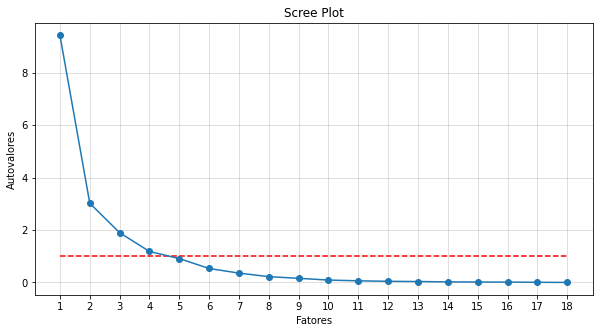

In [142]:
x = np.arange(1, df_.shape[1]+1)

plt.figure(figsize=(10,5))
plt.plot(x, original_ev, '-o')
plt.hlines(y=1, xmin=np.min(x), xmax=np.max(x), color='r', linestyle='--')
plt.xticks(x)
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.title('Scree Plot')
plt.grid(alpha=0.5)
plt.show()

Interpretando o threshold de 1: considerando uma distribuição normal padronizada ($Z$ ~ $N(\mu=0, \sigma²=1$), a própria variância é igual a 1. Nesse caso, escolhemos os fatores cujo autovalor é superior a 1, ou seja, fatores que explicam mais a variância que uma única variável observada.

## Interpretando os fatores
---

Após a extração do número de fatores utilizando os critérios acima i.e. fatores = 4, um novo objeto é criado com tal número de fatores para a interpretação dos resultados. Abaixo, a rotação `varimax` é utilizada [[11]](https://en.wikipedia.org/wiki/Varimax_rotation), que é uma rotação ortogonal, ou seja, os fatores permanecerão sem correlação.

No caso, a rotação muda a distribuição da proporção de variância explicada pelo modelo, mas a variância cumulativa permanece a mesma  [[12]](https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/).

In [143]:
fa_ = FactorAnalyzer(n_factors=4, rotation='varimax')

fa_.fit(df_)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

### Carga fatorial
---

A carga fatorial indica quanto um fator explica uma variável i.e. grau de relação linear entre o fator e a variável padronizada.

Os valores variam entre -1 e 1, indicando que o fator influencia tal variável, sendo que valores próximos a 0 indicam que o fator tem pouca influência sobre a variável. 

Tomando como exemplo a variável `Scat.Ra`, vemos que o primeiro fator possui alta relação linear positiva com a mesma, mas o segundo, terceiro e quarto fatores possuem pouca relação, sendo mais próximos de zero. O mesmo vale para a variável `Sc.Var.Maxis`. Em outras palavras, `Factor1` explica a variância comum para veículos que possuem ambas as variáveis.

In [144]:
pd.DataFrame(fa_.loadings_, columns=['Factor1','Factor2','Factor3','Factor4'],
             index=df_.columns)

,Factor1,Factor2,Factor3,Factor4
Comp,0.803051,0.313317,0.041687,0.030465
Circ,0.894723,-0.074912,0.129740,0.423195
D.Circ,0.905071,0.227493,0.117197,-0.034405
Rad.Ra,0.695016,0.339934,0.580269,-0.121669
Pr.Axis.Ra,0.048443,0.104333,0.970093,-0.031811
Max.L.Ra,0.158133,-0.071902,0.678018,0.038436
Scat.Ra,0.995485,0.022655,0.045075,-0.087170
Elong,-0.955303,-0.120579,-0.113251,0.081619
Pr.Axis.Rect,0.991300,0.002865,0.022778,-0.077307
Max.L.Rect,0.842137,-0.052170,0.135483,0.408601


### Variância
---

O dataframe abaixo apresenta a variância explicada por cada fator em sua primeira linha, a proporção da variância de cada fator em relação à variância total na segunda linha, e a variância acumulada na terceira.

Nota-se que 85.9% da variância dos dados originais pode ser explicada por quatro fatores.
Aqui é importante mencionar que, para análises sem rotação, as variâncias seriam iguais aos autovalores, como aplicado na análise acima, durante a seleção do número de fatores.



In [145]:
pd.DataFrame(fa_.get_factor_variance(), columns=['Factor1','Factor2','Factor3','Factor4'],
            index=['Variance','Proportional_Variance','Cumulative_Variance'])

,Factor1,Factor2,Factor3,Factor4
Variance,8.979193,2.908871,2.010983,0.742267
Proportional_Variance,0.498844,0.161604,0.111721,0.041237
Cumulative_Variance,0.498844,0.660448,0.772169,0.813406


### Comunalidades
---

A comunalidade representa a proporção da variância de cada variável que pode ser explicada pelos fatores. Neste caso, por exemplo, considerando a variável `Comp`, cerca de 75% de sua variância pode ser explicada pelos quatro fatores selecionados. Nota-se que também que diversas variáveis possuem valores próximos a 1.0, ou seja, aproximadamente toda a variância de tal variável pode ser explicada pelos quatro fatores do modelo.

In [146]:
pd.DataFrame(fa_.get_communalities(), columns=['Comunalidades'],
            index=df_.columns)

,Comunalidades
Comp,0.745724
Circ,1.002068
D.Circ,0.885825
Rad.Ra,0.950118
Pr.Axis.Ra,0.955324
Max.L.Ra,0.491362
Scat.Ra,1.001135
Elong,0.946631
Pr.Axis.Rect,0.989179
Max.L.Rect,0.897226
